In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler

import matplotlib.pyplot as plt
import statsmodels.api as sm 

from sklearn.compose import ColumnTransformer


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU




In [2]:
df = pd.read_csv('Airline_customer_satisfaction.csv')

In [3]:
df = df.dropna()
df.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [4]:
df.head()
df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'dissatisfied': 0})
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [6]:
categorical_col = X.select_dtypes(include=['object']).columns
numerical_col = X.select_dtypes(include=['number', 'float']).columns

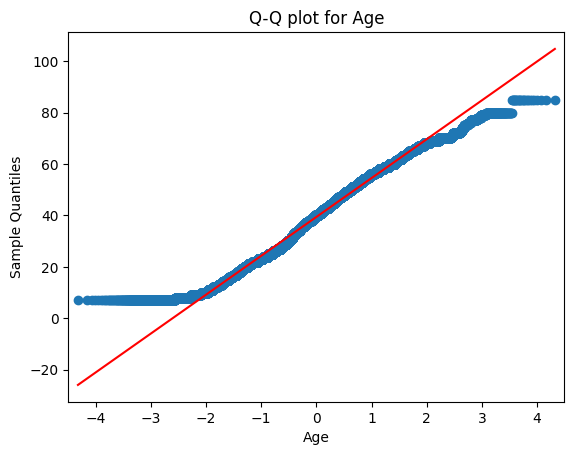

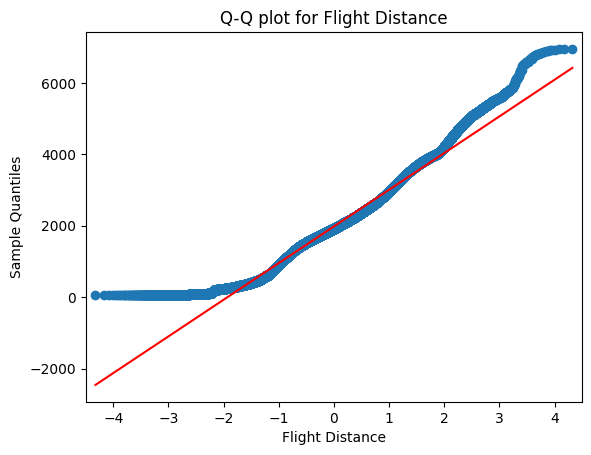

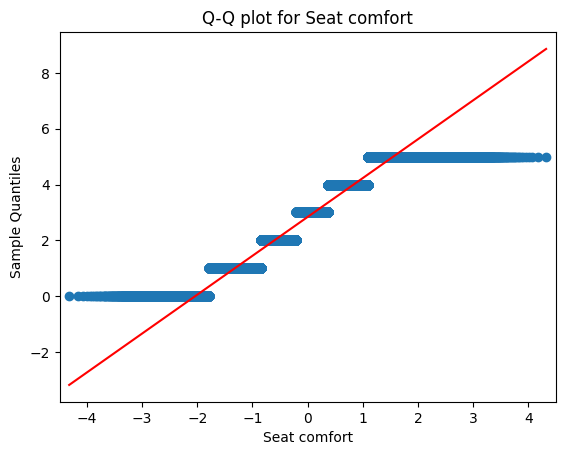

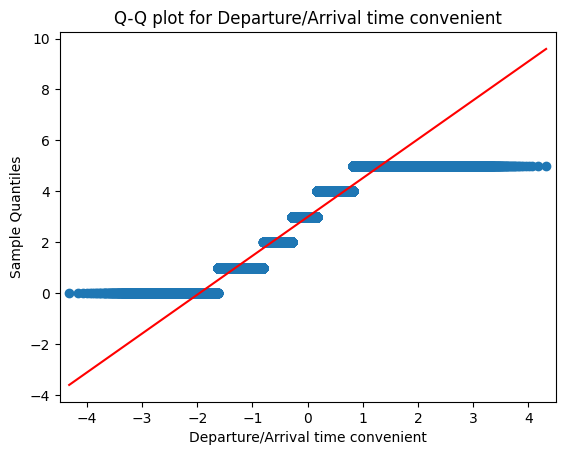

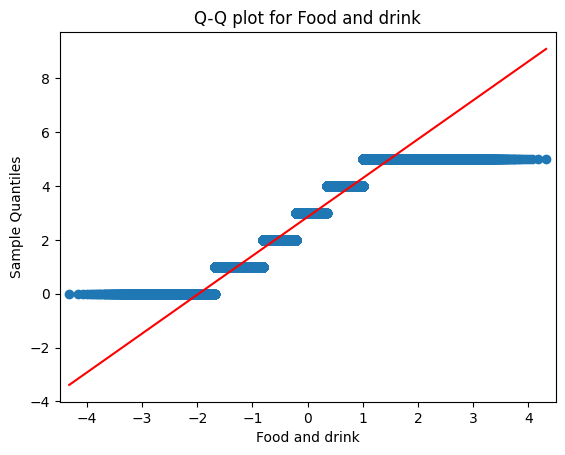

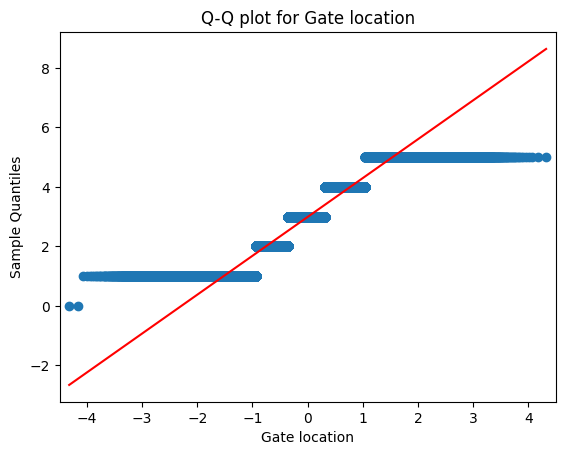

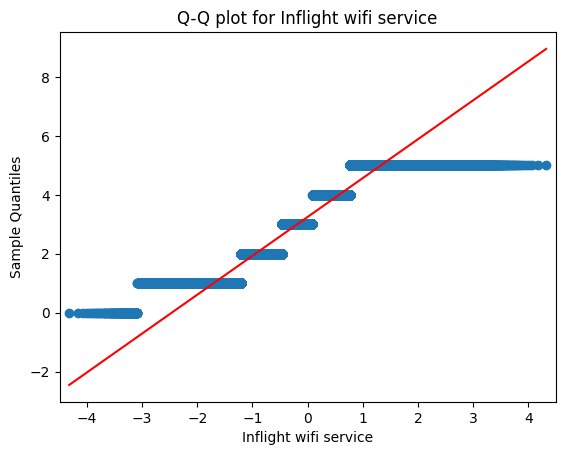

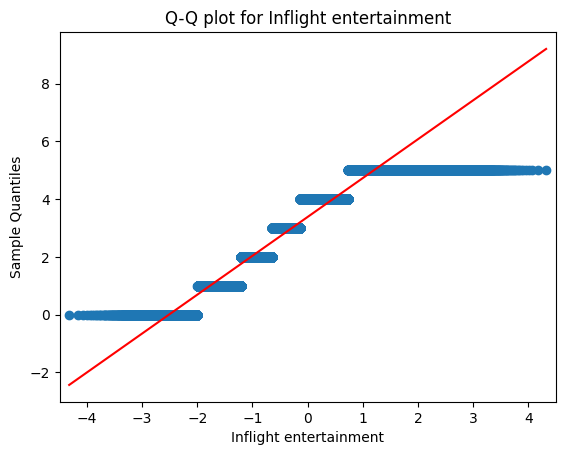

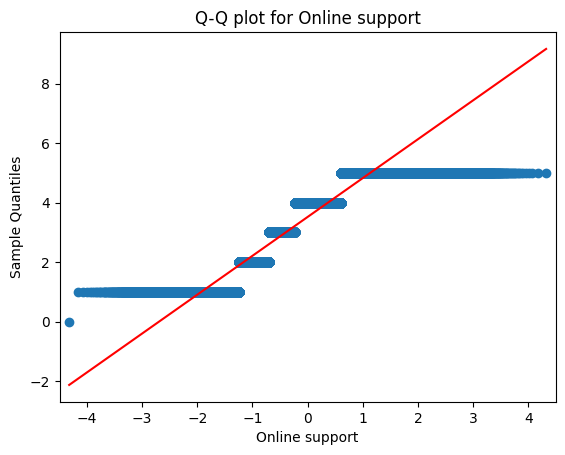

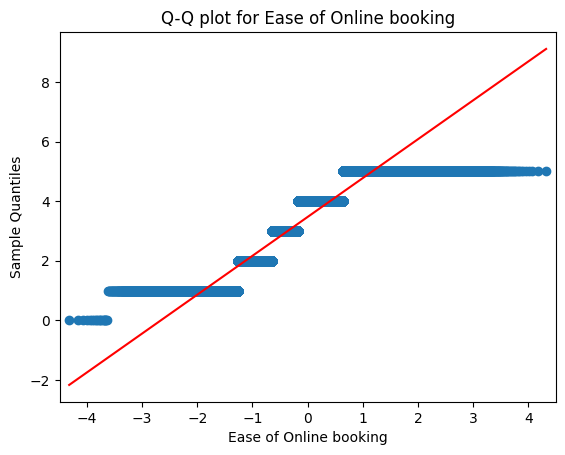

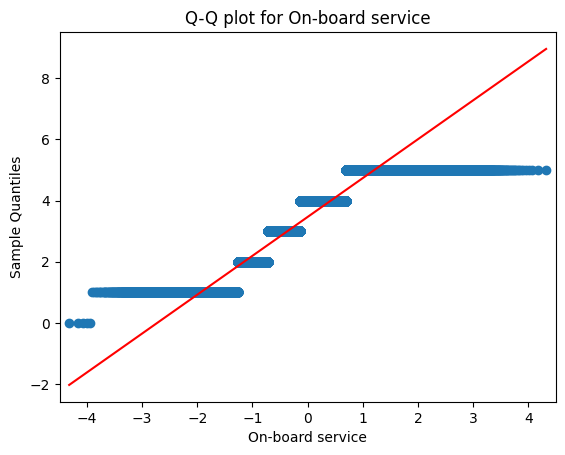

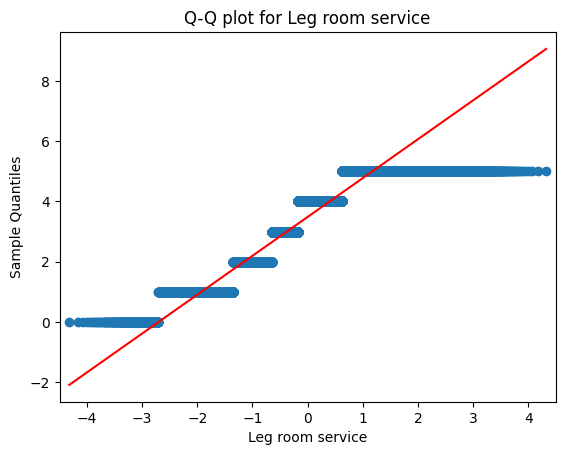

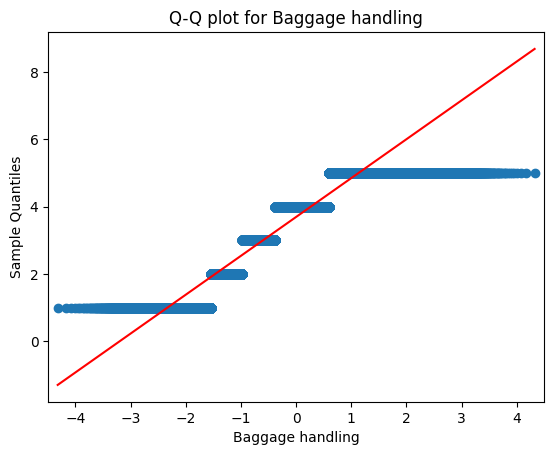

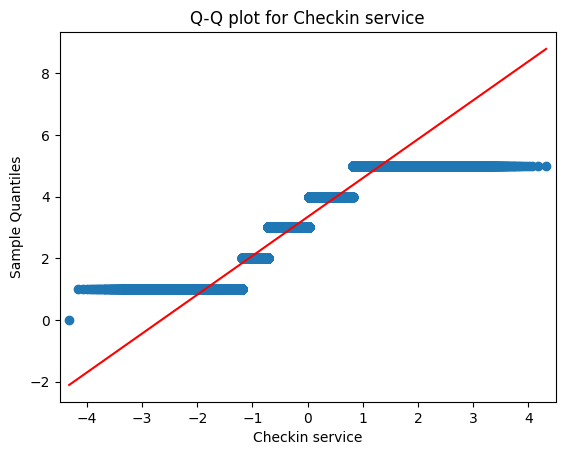

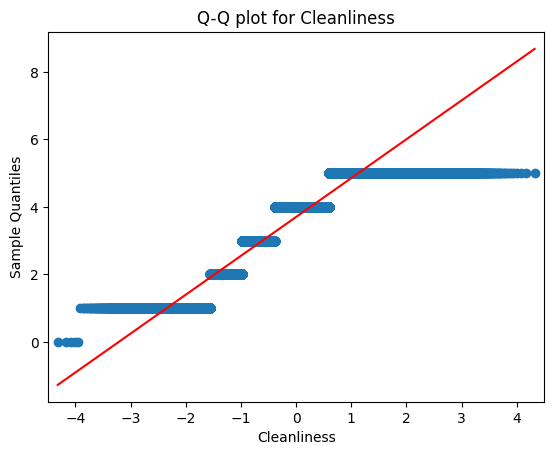

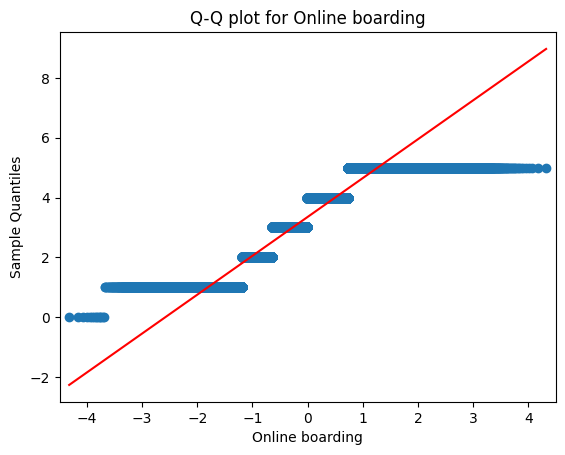

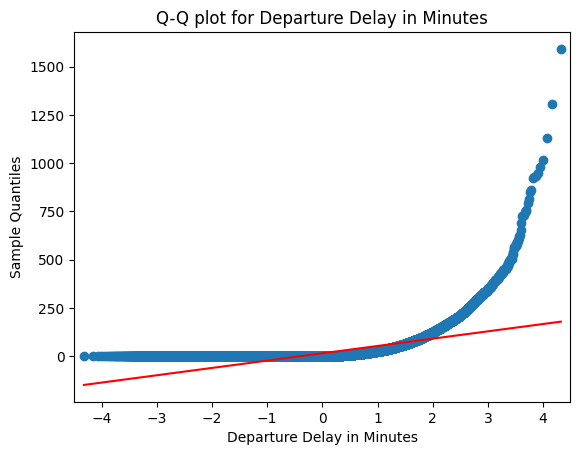

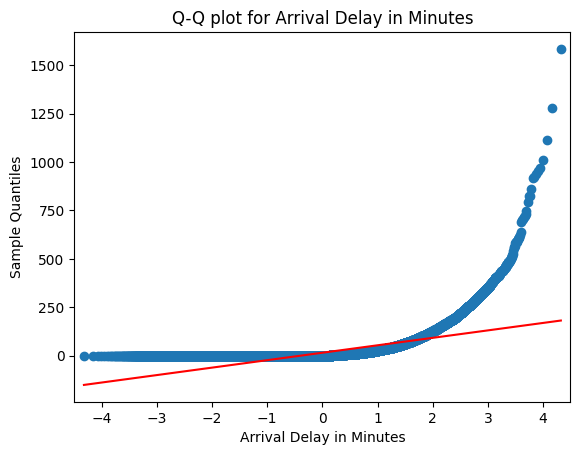

In [7]:
# #add qq plots
for column in X.columns:
  if pd.api.types.is_numeric_dtype(X[column]):
    
    
    sm.qqplot(X[column], line = 's')
    plt.title(f'Q-Q plot for {column}')
    plt.xlabel(column)
    plt.show()

    


In [8]:
preprocess = ColumnTransformer(
  transformers= [
    ('num', MinMaxScaler(),numerical_col),
    ('cat', OneHotEncoder(), categorical_col)
  ]
)

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33,
                                                    random_state=42)



In [10]:
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)

In [11]:
np.isnan(X_train).sum()

0

In [12]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.05))  
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))  
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
2169/2169 [==============================] - 5s 2ms/step - loss: 0.3902 - accuracy: 0.8253 - val_loss: 0.2771 - val_accuracy: 0.8790
Epoch 2/20
2169/2169 [==============================] - 4s 2ms/step - loss: 0.2900 - accuracy: 0.8768 - val_loss: 0.2375 - val_accuracy: 0.8994
Epoch 3/20
2169/2169 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.8900 - val_loss: 0.2214 - val_accuracy: 0.9042
Epoch 4/20
2169/2169 [==============================] - 4s 2ms/step - loss: 0.2453 - accuracy: 0.8963 - val_loss: 0.2072 - val_accuracy: 0.9126
Epoch 5/20
2169/2169 [==============================] - 4s 2ms/step - loss: 0.2326 - accuracy: 0.9014 - val_loss: 0.2094 - val_accuracy: 0.9092
Epoch 6/20
2169/2169 [==============================] - 4s 2ms/step - loss: 0.2266 - accuracy: 0.9045 - val_loss: 0.1965 - val_accuracy: 0.9145
Epoch 7/20
2169/2169 [==============================] - 4s 2ms/step - loss: 0.2183 - accuracy: 0.9083 - val_loss: 0.2034 - val_accuracy:

<Axes: >

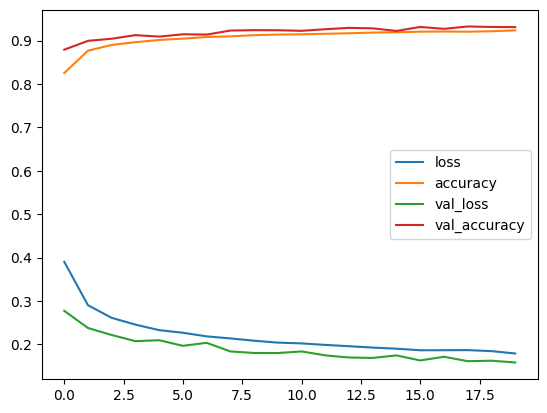

In [13]:
hist_df = pd.DataFrame(model.history.history)
hist_df.plot()

In [14]:
model.evaluate(X_test,y_test,verbose=1)

1336/1336 [==============================] - 1s 975us/step - loss: 0.1532 - accuracy: 0.9347


[0.1531948745250702, 0.9347078204154968]

In [15]:
model.evaluate(X_train,y_train,verbose=1)

2712/2712 [==============================] - 3s 1ms/step - loss: 0.1523 - accuracy: 0.9346


[0.15225495398044586, 0.9345982074737549]

In [16]:
pred = model.predict(X_test)
pred

1336/1336 [==============================] - 2s 1ms/step


array([[0.99908566],
       [0.06623651],
       [0.00984711],
       ...,
       [0.00976993],
       [0.99854594],
       [0.00439324]], dtype=float32)

In [17]:
test_pred = pd.Series(pred.reshape(42731,))
test_pred = test_pred.apply((lambda x: 1 if x>= 0.5 else 0))
test_pred = pd.DataFrame(test_pred)
true_val = pd.DataFrame(y_test)
true_val
test_pred


,0
0,1
1,0
2,0
3,1
4,0
...,...
42726,1
42727,0
42728,0
42729,1


In [18]:
df_eval = pd.concat([true_val.reset_index(drop = True),test_pred.reset_index(drop = True)], axis  = 1)
df_eval = df_eval.rename(columns={'satisfaction': 'true_val', 0:'Pred'})
df_eval


,true_val,Pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
42726,1,1
42727,0,0
42728,0,0
42729,1,1


In [19]:
conf_matrix = confusion_matrix(true_val, test_pred)
conf_matrix

array([[18499,   921],
       [ 1869, 21442]], dtype=int64)

In [20]:
print(classification_report(true_val, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     19420
           1       0.96      0.92      0.94     23311

    accuracy                           0.93     42731
   macro avg       0.93      0.94      0.93     42731
weighted avg       0.94      0.93      0.93     42731



In [22]:
print(f1_score(true_val, test_pred))

0.9389149187721679


In [23]:
df = pd.read_csv('Airline_customer_satisfaction.csv')